In [1]:
import numpy as np
import pandas as pd

In [3]:
df1=pd.read_csv('insurance.csv')

In [4]:
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
from matplotlib import pyplot as plt

In [6]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [7]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df2=df1.drop(['children'],axis='columns')
df2.head()

,age,sex,bmi,smoker,region,expenses
0,19,female,27.9,yes,southwest,16884.92
1,18,male,33.8,no,southeast,1725.55
2,28,male,33.0,no,southeast,4449.46
3,33,male,22.7,no,northwest,21984.47
4,32,male,28.9,no,northwest,3866.86


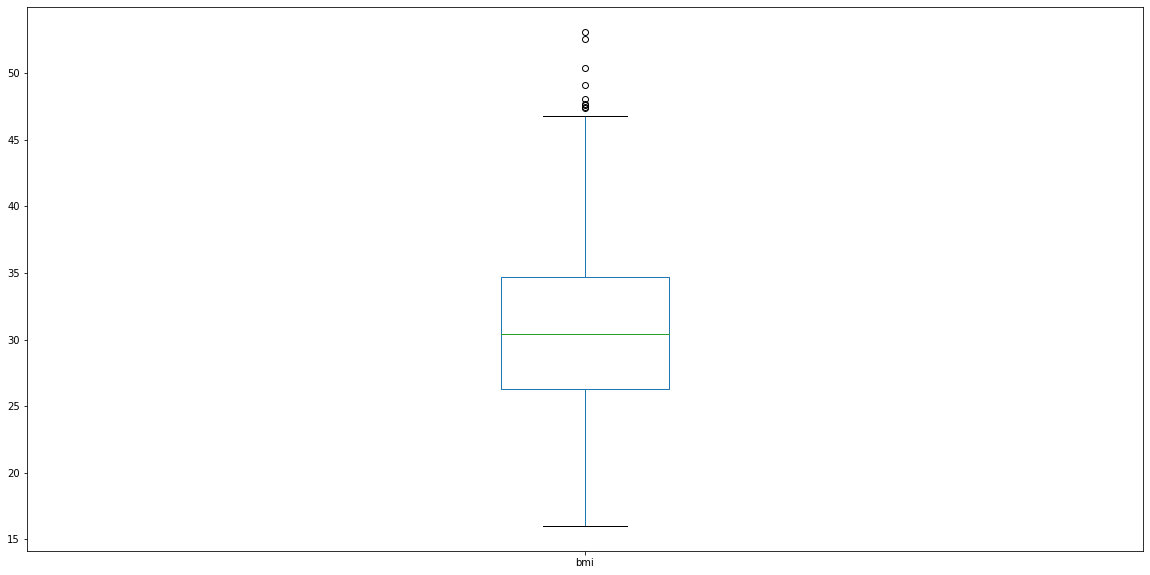

In [9]:
def plt_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plt_boxplot(df2,'bmi')

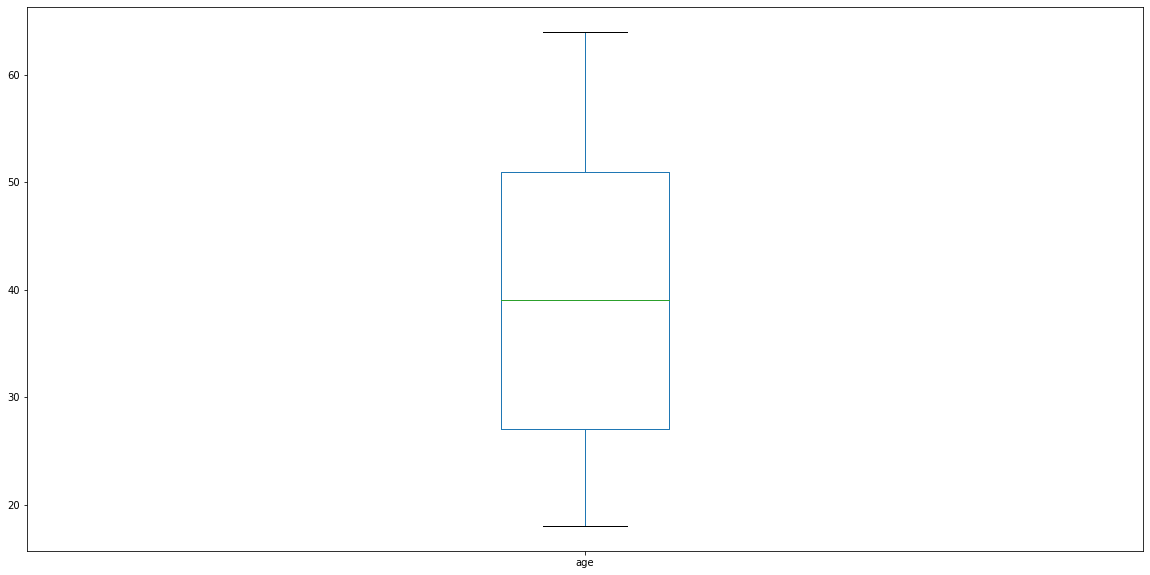

In [11]:
plt_boxplot(df2,'age')

In [12]:
df2.bmi.describe()

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

Text(0, 0.5, 'Count')

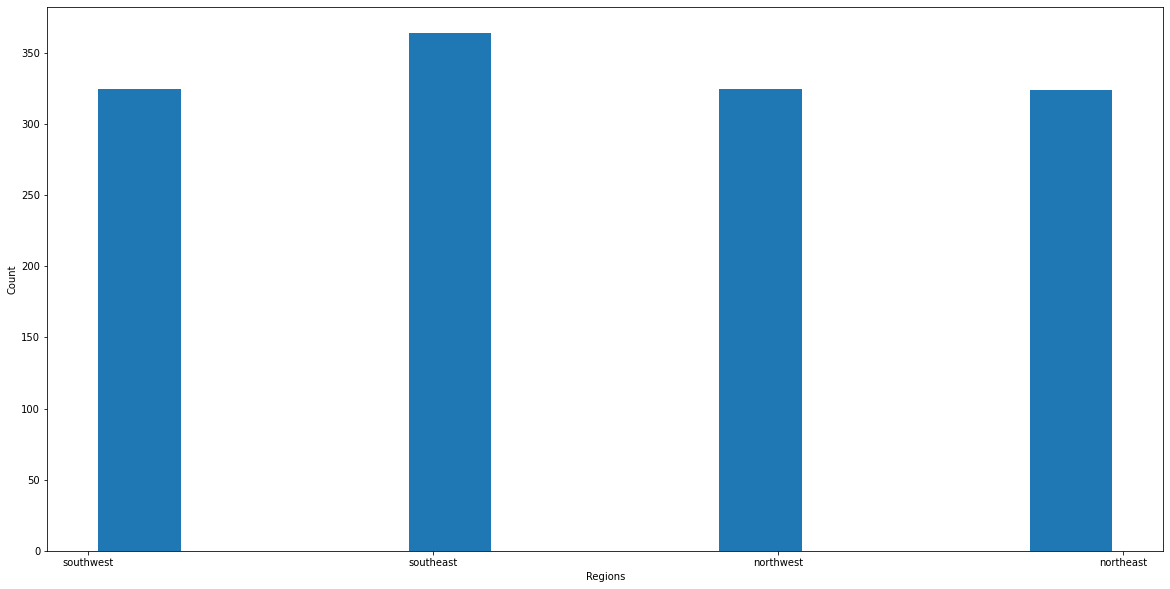

In [13]:
plt.hist(df2.region,rwidth=0.8)
plt.xlabel("Regions")
plt.ylabel("Count")

In [14]:
dummies = pd.get_dummies(df2.region)

In [15]:
dummies.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [16]:
df3=pd.concat([df2,dummies.drop(['southwest'],axis='columns')],axis='columns')
df3.head()

,age,sex,bmi,smoker,region,expenses,northeast,northwest,southeast
0,19,female,27.9,yes,southwest,16884.92,0,0,0
1,18,male,33.8,no,southeast,1725.55,0,0,1
2,28,male,33.0,no,southeast,4449.46,0,0,1
3,33,male,22.7,no,northwest,21984.47,0,1,0
4,32,male,28.9,no,northwest,3866.86,0,1,0


In [17]:
df4=df3.drop(['region'],axis='columns')
df4.head()

,age,sex,bmi,smoker,expenses,northeast,northwest,southeast
0,19,female,27.9,yes,16884.92,0,0,0
1,18,male,33.8,no,1725.55,0,0,1
2,28,male,33.0,no,4449.46,0,0,1
3,33,male,22.7,no,21984.47,0,1,0
4,32,male,28.9,no,3866.86,0,1,0


In [23]:
dummy2=pd.get_dummies(df4.smoker)

In [24]:
df5=pd.concat([df4,dummy2.drop(['yes'],axis='columns')],axis='columns')
df5.head()

,age,sex,bmi,smoker,expenses,northeast,northwest,southeast,no
0,19,female,27.9,yes,16884.92,0,0,0,0
1,18,male,33.8,no,1725.55,0,0,1,1
2,28,male,33.0,no,4449.46,0,0,1,1
3,33,male,22.7,no,21984.47,0,1,0,1
4,32,male,28.9,no,3866.86,0,1,0,1


In [27]:
df6 = df5.drop('smoker',axis=1)

In [28]:
df6.head()

,age,sex,bmi,expenses,northeast,northwest,southeast,no
0,19,female,27.9,16884.92,0,0,0,0
1,18,male,33.8,1725.55,0,0,1,1
2,28,male,33.0,4449.46,0,0,1,1
3,33,male,22.7,21984.47,0,1,0,1
4,32,male,28.9,3866.86,0,1,0,1


In [29]:
dummy3=pd.get_dummies(df6.sex)

In [30]:
df7=pd.concat([df6,dummy3.drop(['female'],axis='columns')],axis='columns')

In [31]:
df7.head()

,age,sex,bmi,expenses,northeast,northwest,southeast,no,male
0,19,female,27.9,16884.92,0,0,0,0,0
1,18,male,33.8,1725.55,0,0,1,1,1
2,28,male,33.0,4449.46,0,0,1,1,1
3,33,male,22.7,21984.47,0,1,0,1,1
4,32,male,28.9,3866.86,0,1,0,1,1


In [32]:
df8=df7.drop('sex',axis='columns')

In [134]:
df8.shape

(1338, 8)

In [137]:
df9.head(10)

,age,bmi,expenses,northeast,northwest,southeast,no,male
0,19,27.9,16884.92,0,0,0,0,0
1,18,33.8,1725.55,0,0,1,1,1
2,28,33.0,4449.46,0,0,1,1,1
3,33,22.7,21984.47,0,1,0,1,1
4,32,28.9,3866.86,0,1,0,1,1
5,31,25.7,3756.62,0,0,1,1,0
6,46,33.4,8240.59,0,0,1,1,0
7,37,27.7,7281.51,0,1,0,1,0
8,37,29.8,6406.41,1,0,0,1,1
9,60,25.8,28923.14,0,1,0,1,0


In [85]:
X = df9.drop(['expenses'],axis='columns')
y = df9.expenses

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [43]:
X.shape

(1329, 7)

In [45]:
y.shape

(1329,)

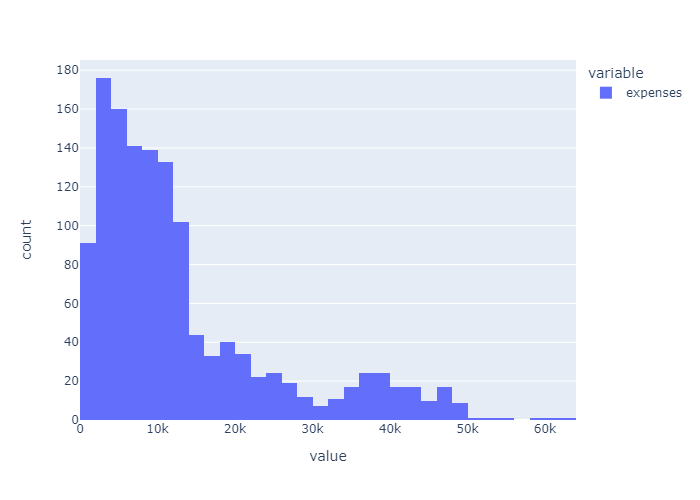

In [58]:
import plotly.express as px
fig = px.histogram(y)
fig.show('png')

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.6953957109328579

In [61]:
y_pred = lr_clf.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 Score:--->',r2_score(Y_test,y_pred))
print('Mean Abs Error:--->',mean_absolute_error(Y_test,y_pred))

R2 Score:---> 0.6953957109328579
Mean Abs Error:---> 4365.6965029832


In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.70636789, 0.75430465, 0.75012306, 0.73831531, 0.74562336])

In [53]:
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.738947,{'normalize': False}
1,lasso,0.739014,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.701904,"{'criterion': 'mse', 'splitter': 'random'}"


In [52]:
from sklearn.ensemble import RandomForestRegressor
Rf_clf = RandomForestRegressor()
Rf_clf.fit(X_train,Y_train)
Rf_clf.score(X_test,Y_test)

0.7893416906815307

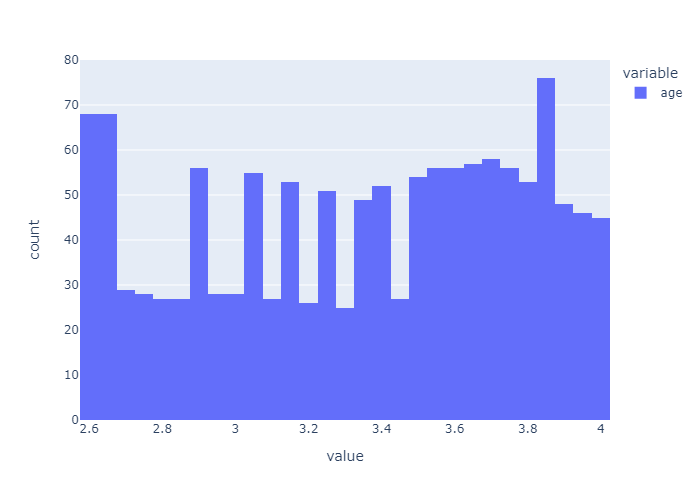

In [77]:
import plotly.express as px
fig = px.histogram(np.cbrt(X.age))
fig.show('png')

In [86]:
X

,age,bmi,northeast,northwest,southeast,no,male
0,19,27.9,0,0,0,0,0
1,18,33.8,0,0,1,1,1
2,28,33.0,0,0,1,1,1
3,33,22.7,0,1,0,1,1
4,32,28.9,0,1,0,1,1
...,...,...,...,...,...,...,...
1333,50,31.0,0,1,0,1,1
1334,18,31.9,1,0,0,1,0
1335,18,36.9,0,0,1,1,0
1336,21,25.8,0,0,0,1,0


In [87]:
X['age'] = np.log(X['age'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20,random_state=10)

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

y_pred = lr_clf.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print('R2 Score:--->',r2_score(Y_test,y_pred))
print('Mean Abs Error:--->',mean_absolute_error(Y_test,y_pred))

R2 Score:---> 0.6874380397350324
Mean Abs Error:---> 4499.593595891093
